In [4]:
import os, time, pickle, argparse, networks, utils
import torch.nn as nn
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
img = cv2.resize(cv2.imread(image_filename[0]), (256,256))/255. * 2 - 1

NameError: name 'image_filename' is not defined

In [5]:
G_Paprika = networks.TransformerExplode()
G_Paprika.load_state_dict(torch.load('pretrained_model/Paprika_net_G_float.pth'))
G_Hayao = networks.TransformerExplode()
G_Hayao.load_state_dict(torch.load('pretrained_model/Hayao_net_G_float.pth'))
G_Hosoda = networks.TransformerExplode()
G_Hosoda.load_state_dict(torch.load('pretrained_model/Hosoda_net_G_float.pth'))
G_Shinkai = networks.TransformerExplode()
G_Shinkai.load_state_dict(torch.load('pretrained_model/Shinkai_net_G_float.pth'))

<All keys matched successfully>

In [6]:
real_image_path = '/home/jojoproject785/jojo-project/baseline/data/land/landscape-pictures'

In [7]:
image_filename = []
image = []
a = 0
for i in os.listdir(real_image_path):
    image_filename.append(os.path.join(real_image_path, i))
    image.append(cv2.resize(cv2.imread(image_filename[-1]), (256,256)).transpose((2,0,1))/255. * 2 - 1)
    if a > 10:
        break
    a += 1
image = torch.tensor(image).float()


In [8]:
def get_net_out(model, image):
    out, net = model(image)
    out = out.detach().numpy()
    for key in net:
        net[key] = net[key].detach().numpy()
        
    return out, net

In [9]:
out_Paprika, net_Paprika = get_net_out(G_Paprika, image)
out_Hayao, net_Hayao = get_net_out(G_Hayao, image)
out_Hosoda, net_Hosoda = get_net_out(G_Hosoda, image)
out_Shinkai, net_Shinkai = get_net_out(G_Shinkai, image)


/opt/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [24]:
plt.rcParams['figure.figsize'] = [15, 30]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


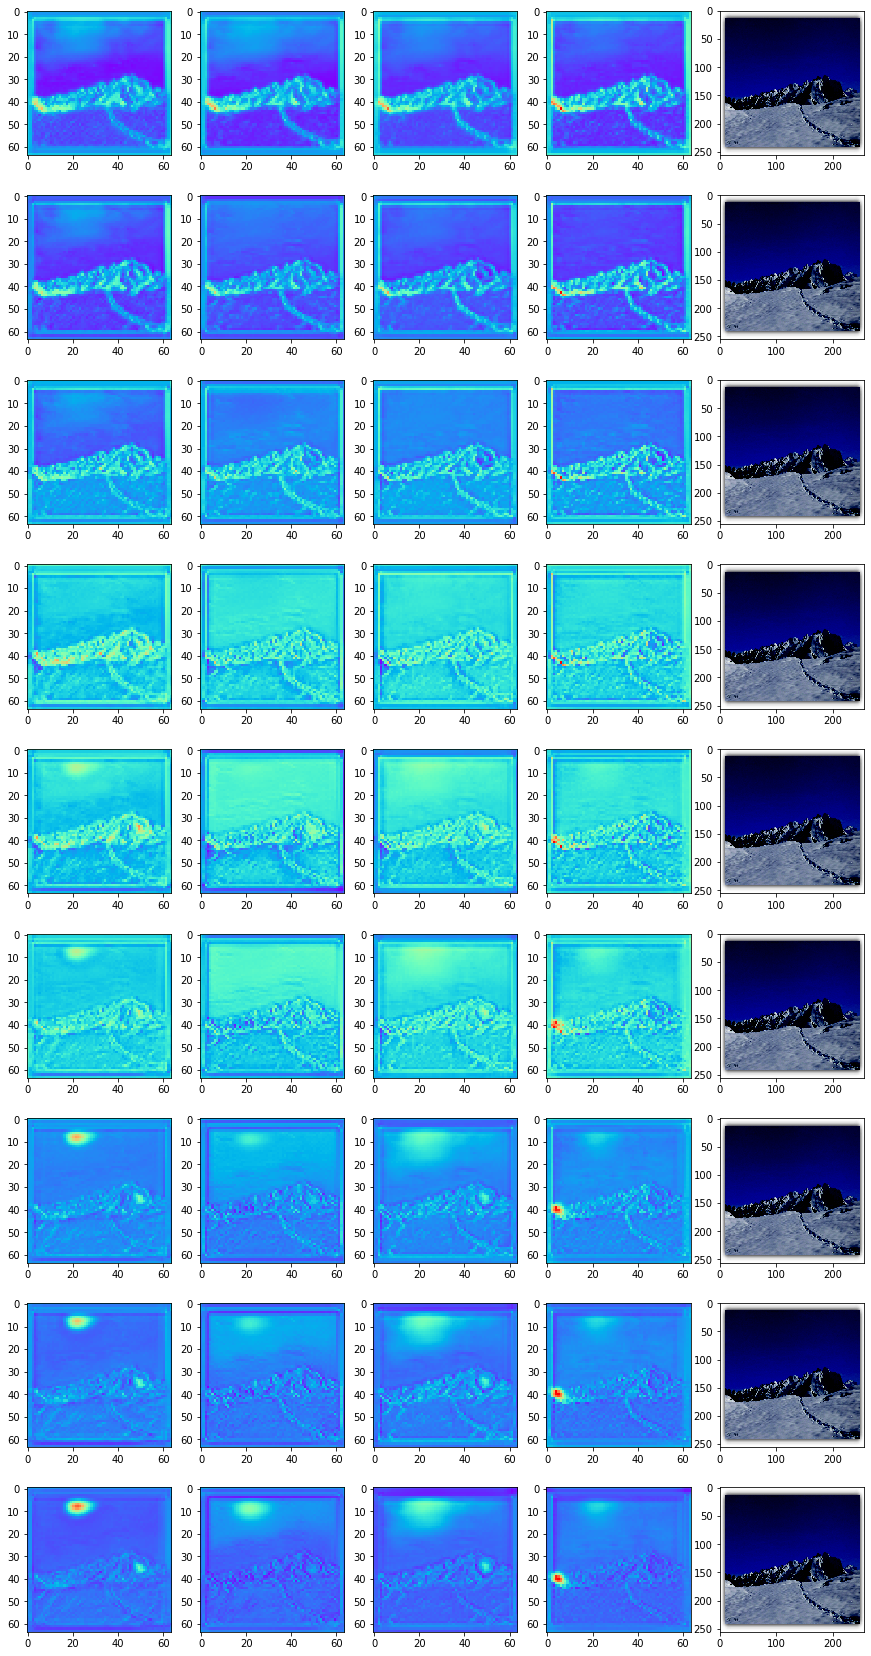

In [26]:
fig, axs = plt.subplots(9, 5)
a = 0
for i in ['t04','t05','t06','t07','t08','t09','t10','t11','t12']:
    channel = i
    img_num = 7
    cmap = 'rainbow'

    map_Paprika = np.mean((net_Paprika[channel][img_num]), axis=0)
    map_Hayao = np.mean((net_Hayao[channel][img_num]), axis=0)
    map_Hosoda = np.mean((net_Hosoda[channel][img_num]), axis=0)
    map_Shinkai = np.mean((net_Shinkai[channel][img_num]), axis=0)

    vmin = np.min([map_Paprika, map_Hayao, map_Hosoda, map_Shinkai])
    vmax = np.max([map_Paprika, map_Hayao, map_Hosoda, map_Shinkai])


    axs[a,0].imshow(map_Paprika, cmap=cmap, vmin=vmin, vmax=vmax)
    axs[a,1].imshow(map_Hayao, cmap=cmap, vmin=vmin, vmax=vmax)
    axs[a,2].imshow(map_Hosoda, cmap=cmap, vmin=vmin, vmax=vmax)
    axs[a,3].imshow(map_Shinkai, cmap=cmap, vmin=vmin, vmax=vmax)
    axs[a,4].imshow(image[img_num].numpy().transpose((1,2,0))[:,:,[2,1,0]])
    a += 1



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


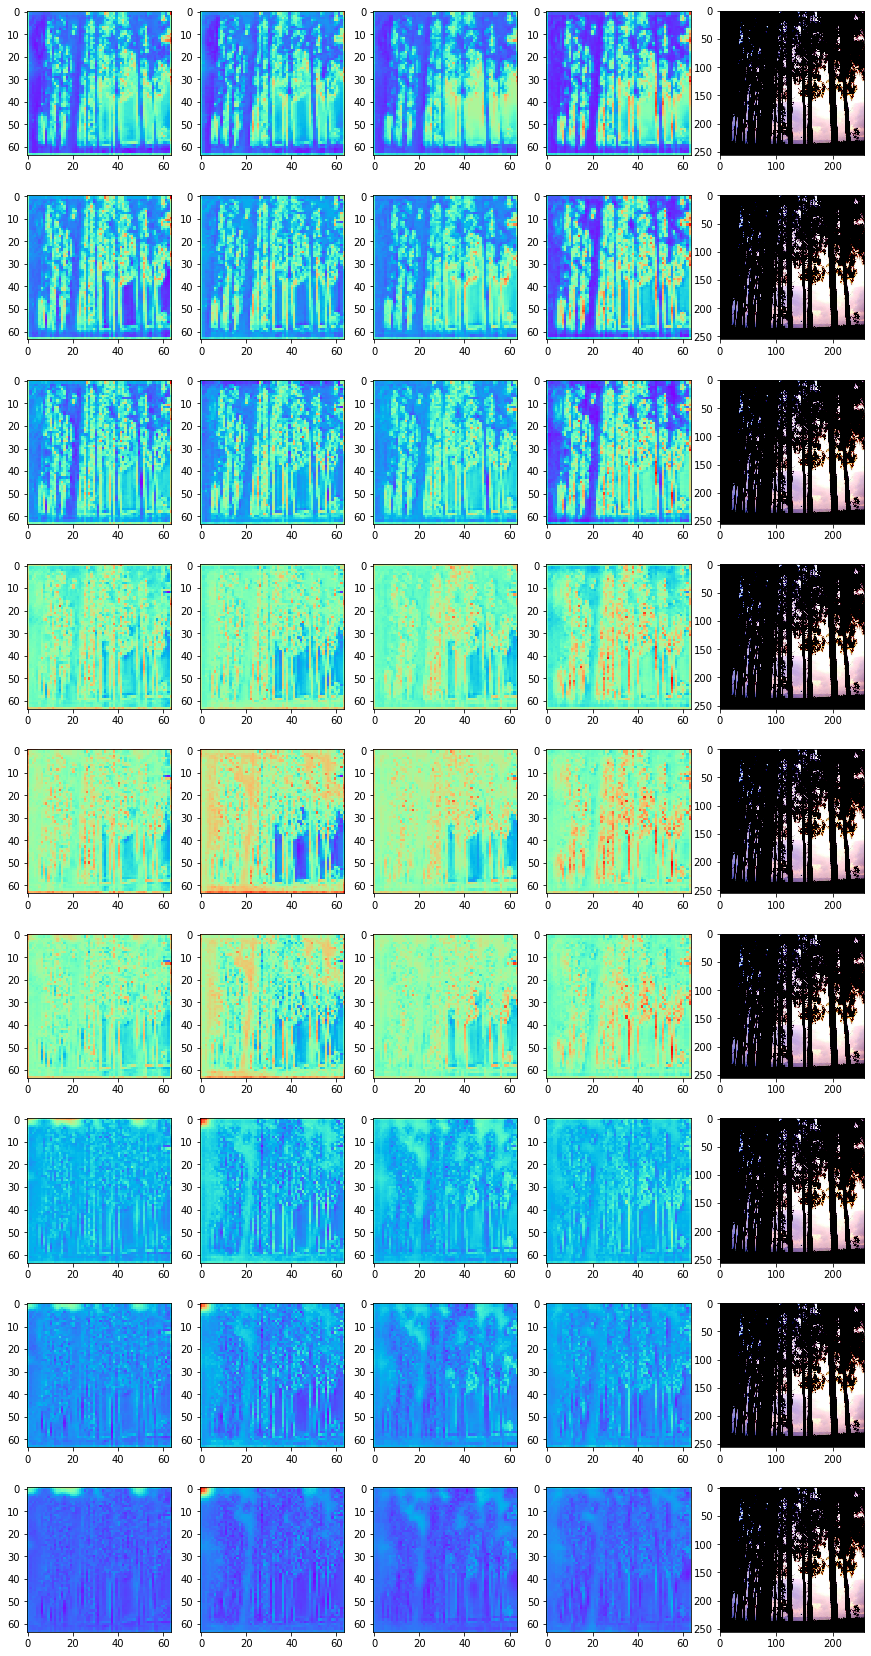

In [27]:
fig, axs = plt.subplots(9, 5)
a = 0
for i in ['t04','t05','t06','t07','t08','t09','t10','t11','t12']:
    channel = i
    img_num = 0
    cmap = 'rainbow'

    map_Paprika = np.mean((net_Paprika[channel][img_num]), axis=0)
    map_Hayao = np.mean((net_Hayao[channel][img_num]), axis=0)
    map_Hosoda = np.mean((net_Hosoda[channel][img_num]), axis=0)
    map_Shinkai = np.mean((net_Shinkai[channel][img_num]), axis=0)

    vmin = np.min([map_Paprika, map_Hayao, map_Hosoda, map_Shinkai])
    vmax = np.max([map_Paprika, map_Hayao, map_Hosoda, map_Shinkai])


    axs[a,0].imshow(map_Paprika, cmap=cmap, vmin=vmin, vmax=vmax)
    axs[a,1].imshow(map_Hayao, cmap=cmap, vmin=vmin, vmax=vmax)
    axs[a,2].imshow(map_Hosoda, cmap=cmap, vmin=vmin, vmax=vmax)
    axs[a,3].imshow(map_Shinkai, cmap=cmap, vmin=vmin, vmax=vmax)
    axs[a,4].imshow(image[img_num].numpy().transpose((1,2,0))[:,:,[2,1,0]])
    a += 1


In [ ]:
fig, axs = plt.subplots(9, 5)
a = 0
for i in ['t04','t05','t06','t07','t08','t09','t10','t11','t12']:
    channel = i
    img_num = 
    cmap = 'rainbow'

    map_Paprika = np.mean((net_Paprika[channel][img_num]), axis=0)
    map_Hayao = np.mean((net_Hayao[channel][img_num]), axis=0)
    map_Hosoda = np.mean((net_Hosoda[channel][img_num]), axis=0)
    map_Shinkai = np.mean((net_Shinkai[channel][img_num]), axis=0)

    vmin = np.min([map_Paprika, map_Hayao, map_Hosoda, map_Shinkai])
    vmax = np.max([map_Paprika, map_Hayao, map_Hosoda, map_Shinkai])


    axs[a,0].imshow(map_Paprika, cmap=cmap, vmin=vmin, vmax=vmax)
    axs[a,1].imshow(map_Hayao, cmap=cmap, vmin=vmin, vmax=vmax)
    axs[a,2].imshow(map_Hosoda, cmap=cmap, vmin=vmin, vmax=vmax)
    axs[a,3].imshow(map_Shinkai, cmap=cmap, vmin=vmin, vmax=vmax)
    axs[a,4].imshow(image[img_num].numpy().transpose((1,2,0))[:,:,[2,1,0]])
    a += 1
